## Car price prediction


In [1]:
# import neceassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
#import data
df=pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# store categorical features
cat_feat =[feature for feature in df.columns if df[feature].dtype == "O" or feature == "Owner"]
cat_feat

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [7]:
#check unique values of categorical features
for feature in cat_feat:
    print(df[feature].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [8]:
#check missing values
df.isnull().sum()
#no missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# derive extra feature from the year variable
current_year = 2022
df["Car_age"] = current_year - df["Year"]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [10]:
# remove car name
df = df.drop("Car_Name",axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [12]:
#convert categorical features into numerals using one hot encoding
df = pd.get_dummies(df,drop_first = True)
df.head()



,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,8,0,1,0,1
1,2013,4.75,9.54,43000,0,9,1,0,0,1
2,2017,7.25,9.85,6900,0,5,0,1,0,1
3,2011,2.85,4.15,5200,0,11,0,1,0,1
4,2014,4.60,6.87,42450,0,8,1,0,0,1


In [13]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_age,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

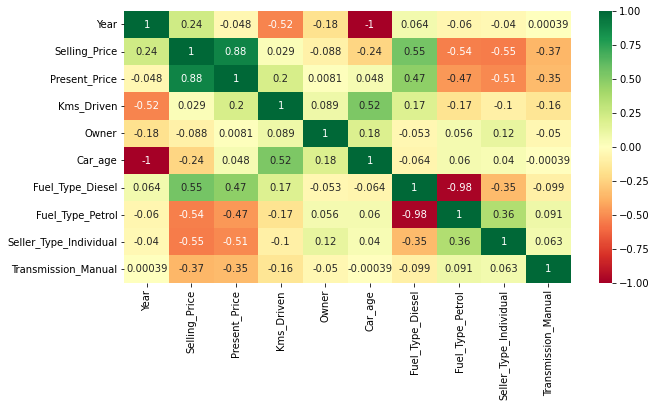

In [14]:
# display correlation with heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot= True,cmap="RdYlGn")

In [15]:
#drop year column
df.drop("Year",axis = 1,inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [16]:
# split data into x and y
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [17]:
x.head()

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [18]:
## feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[0.39245228 0.0442949  0.00122554 0.07472561 0.22330684 0.01292818
 0.12242098 0.12864568]


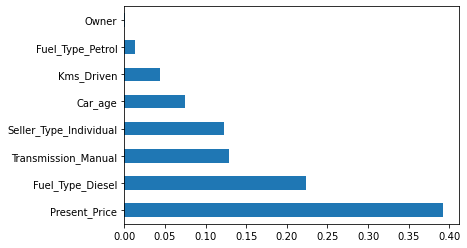

In [20]:
# plot feature importance
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

In [21]:
# train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 ,random_state=0)

In [22]:
x_train.shape

(240, 8)

In [23]:
#implement random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


In [24]:
#Hyperparametert Tuning
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop = 1200,num = 12)]
#number of features to consider at every split
max_features = ["auto","sqrt"]
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]



In [25]:
# import randomized search CV
from sklearn.model_selection import RandomizedSearchCV
# create random_grid
random_grid = {"n_estimators":n_estimators,"max_features":max_features,
              "max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [26]:
#apply randomized searchcv
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,
           verbose=2,random_state=2,n_jobs=1)

In [27]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   4.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   4.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [30]:
predictions

array([ 6.80422222,  0.46285556,  4.56733333,  8.89486667, 15.27728889,
        5.285     ,  3.16672222,  0.43556667,  3.90877778,  4.74205556,
        2.78277778,  0.77993333,  4.80922222,  7.22083333,  7.74265556,
       15.1631    ,  6.66654444,  3.97705556,  0.45333333,  1.60033333,
        3.04027778,  4.97461111,  5.24916667,  9.71978889,  0.20425556,
        0.73525556,  0.3169    ,  0.69555556,  0.47937778,  4.16605556,
        2.54247778,  5.95      ,  0.48724444,  7.41966667,  3.28815556,
        1.16753333,  5.67266667,  5.33022222,  0.25023333,  7.9316    ,
        7.90306667, 23.24933333,  4.89355556,  4.40794444,  5.73511111,
       11.27731111,  0.24148889,  0.78134444,  5.43566667,  6.63172222,
        6.63892222,  3.09155556,  5.35438889, 24.34138889,  1.18015556,
        1.14333333,  0.4778    ,  2.4965    ,  3.55622222,  2.55927778,
        3.82664444])

C:\Users\user\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

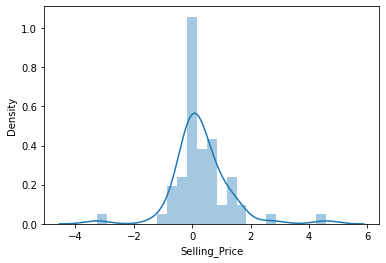

In [29]:
#make predictions
predictions=rf_random.predict(x_test)

sns.distplot(y_test-predictions)


#### The gragh is lineary available which shows that our prediction is pretty cool

In [31]:
# check with r2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,predictions)
print(score)

0.9591851383558819


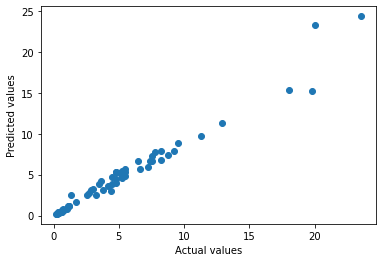

In [32]:
#visualize accuracy
plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

## Save model inform of pickle


In [33]:
# open file to store data
file = open("random_forest_regression_model.pkl","wb")
pickle.dump(rf_random,file)